<a href="https://colab.research.google.com/github/YoooonaLee/machine_learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt


### 데이터셋 로드

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Fashion-MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 데이터 크기 확인
print(f"x_train shape: {x_train.shape}")  # (60000, 28, 28)
print(f"y_train shape: {y_train.shape}")  # (60000,)
print(f"x_test shape: {x_test.shape}")    # (10000, 28, 28)
print(f"y_test shape: {y_test.shape}")    # (10000,)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### 데이터 확인

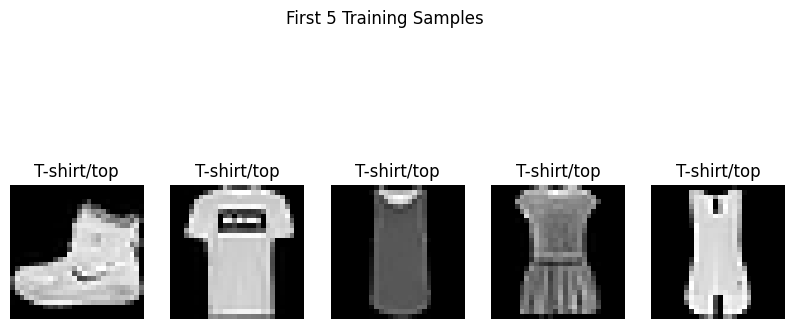

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 클래스 레이블 정의 (Fashion-MNIST의 10개 클래스)
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]



# 훈련 데이터의 첫 5개 샘플 시각화
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_labels[np.argmax(y_train[i])])  # 원핫 인코딩일 경우
    plt.axis('off')
plt.suptitle("First 5 Training Samples")
plt.show()


### 데이터 전처리
- Normalization


- loss='sparse_categorical_crossentropy'

In [ ]:
# 데이터 정규화 (0~255 → 0~1로 스케일링)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### 모델 구성 (함수형 API)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28), name="flatten"),
    Dense(128, activation='relu', name="dense_hidden_1"),
    Dense(64, activation='relu', name="dense_hidden_2"),
    Dense(10, activation='softmax', name="output_layer")  # 10개 클래스
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


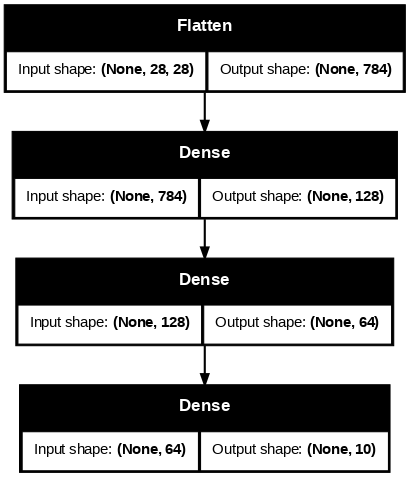

In [ ]:
# 모델 구조 시각화 (dpi 조정)
plot_model(model, show_shapes=True, dpi=76)

### 모델 컴파일

In [ ]:
# 모델 컴파일
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# 모델 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_hidden_1 (Dense)               │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_hidden_2 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [ ]:
# 모델 학습 (Validation 데이터 30% 설정)
history = model.fit(
    x_train, y_train,
    validation_split=0.3,  # 검증 데이터 비율 (30%)
    epochs=15,             # 에포크 수
    batch_size=32,         # 배치 크기
    verbose=1              # 진행 상태 출력
)

Epoch 1/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6269 - loss: 1.1519 - val_accuracy: 0.8041 - val_loss: 0.5662
Epoch 2/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8098 - loss: 0.5540 - val_accuracy: 0.8246 - val_loss: 0.5029
Epoch 3/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8292 - loss: 0.4874 - val_accuracy: 0.8389 - val_loss: 0.4627
Epoch 4/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8443 - loss: 0.4509 - val_accuracy: 0.8468 - val_loss: 0.4442
Epoch 5/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8503 - loss: 0.4323 - val_accuracy: 0.8438 - val_loss: 0.4466
Epoch 6/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8536 - loss: 0.4088 - val_accuracy: 0.8541 - val_loss: 0.4200
Epoch 7/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8618 - loss: 0.3982 - val_accuracy: 0.8606 - val_loss: 0.4081
Epoch 8/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8656 - loss: 0.3850 - 

In [ ]:
# 테스트 데이터로 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.4004
Test Accuracy: 0.8601


### 학습 결과 시각화

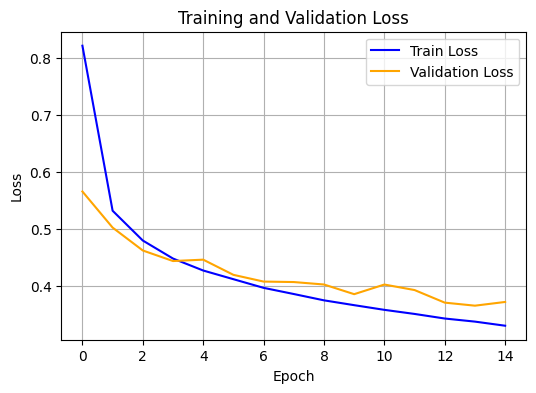

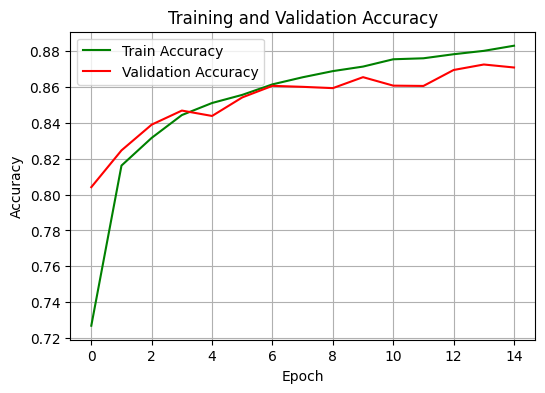

In [ ]:
# 손실 그래프
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 정확도 그래프
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


### 학습된 모델을 통해 값 예측

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted classes: [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
True classes: [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


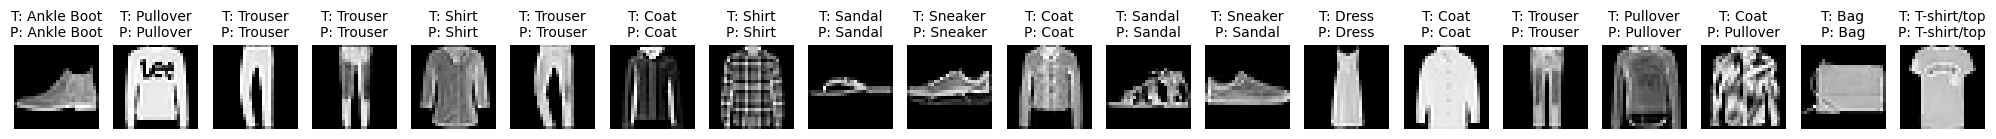

In [ ]:
# 테스트 데이터의 첫 5개 샘플에 대해 예측
predictions = model.predict(x_test[:20])
predicted_classes = predictions.argmax(axis=1)  # 모델이 예측한 클래스
true_classes = y_test[:20]  # 실제 클래스 (정수형 레이블이어야 함)


# 예측 결과 출력
print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)

# 테스트 데이터 첫 5개 샘플과 예측 결과 시각화
plt.figure(figsize=(20, 4))  # 전체 그래프 크기 설정
for i in range(20):
    plt.subplot(1, 20, i + 1)  # 1행 5열로 그래프 생성
    plt.imshow(x_test[i], cmap='gray')  # 흑백 이미지 표시
    plt.title(f"T: {class_labels[true_classes[i]]}\nP: {class_labels[predicted_classes[i]]}", fontsize=10)
    plt.axis('off')  # 축 제거
plt.tight_layout()  # 간격 조정
plt.show()


### 모델 평가
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1000x1000 with 0 Axes>

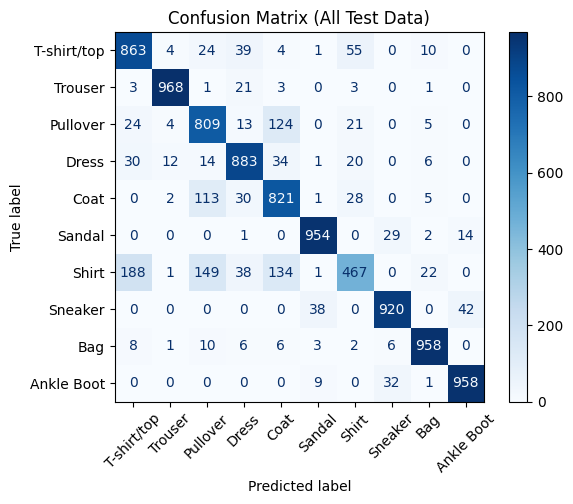

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 전체 테스트 데이터에 대한 예측
predictions_all = model.predict(x_test)
predicted_classes_all = predictions_all.argmax(axis=1)  # 전체 데이터의 예측된 클래스

# 전체 테스트 데이터에 대한 실제 클래스
true_classes_all = y_test  # y_test는 정수형 레이블이어야 함

# 혼동 행렬 계산 및 시각화
cm = confusion_matrix(true_classes_all, predicted_classes_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# 시각화
plt.figure(figsize=(10, 10))
disp.plot(cmap="Blues", values_format='d', xticks_rotation=45)  # x축 레이블 45도 회전
plt.title("Confusion Matrix (All Test Data)")
plt.show()


### 모델 평가 (2)
- 은닉층 2층 추가
- optimizer: adam()로 설정한 모델

In [ ]:
# 모델 생성
strong_model = Sequential([
    Flatten(input_shape=(28, 28), name="flatten"),  # 입력층
    Dense(256, activation='relu', name="dense_hidden_1"),  # 은닉층 1
    Dense(128, activation='relu', name="dense_hidden_2"),  # 은닉층 2
    Dense(64, activation='relu', name="dense_hidden_3"),   # 은닉층 3
    Dense(32, activation='relu', name="dense_hidden_4"),   # 은닉층 4
    Dense(10, activation='softmax', name="output_layer")   # 출력층 (10개 클래스)
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 모델 컴파일 (Adam 옵티마이저 사용)
strong_model.compile(
    optimizer='adam',  # Adam 옵티마이저
    loss='sparse_categorical_crossentropy',  # 정수형 레이블용 손실 함수
    metrics=['accuracy']  # 평가 지표로 정확도 사용
)

In [ ]:
# 모델 학습
history = strong_model.fit(
    x_train, y_train,
    validation_split=0.3,  # 검증 데이터 비율 30%
    epochs=15,             # 에포크 수
    batch_size=32,         # 배치 크기
    verbose=1              # 학습 진행 상태 출력
)



Epoch 1/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7440 - loss: 0.7387 - val_accuracy: 0.8476 - val_loss: 0.4191
Epoch 2/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8628 - loss: 0.3833 - val_accuracy: 0.8624 - val_loss: 0.3777
Epoch 3/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8705 - loss: 0.3529 - val_accuracy: 0.8609 - val_loss: 0.3874
Epoch 4/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8834 - loss: 0.3203 - val_accuracy: 0.8747 - val_loss: 0.3452
Epoch 5/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8887 - loss: 0.3022 - val_accuracy: 0.8767 - val_loss: 0.3447
Epoch 6/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8975 - loss: 0.2792 - val_accuracy: 0.8682 - val_loss: 0.3769
Epoch 7/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8988 - loss: 0.2737 - val_accuracy: 0.8734 - val_loss: 0.3546
Epoch 8/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9020 - loss:

In [ ]:
# 테스트 데이터로 모델 평가
test_loss, test_accuracy = strong_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8727 - loss: 0.3907
Test Loss: 0.3861
Test Accuracy: 0.8734


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 1000x1000 with 0 Axes>

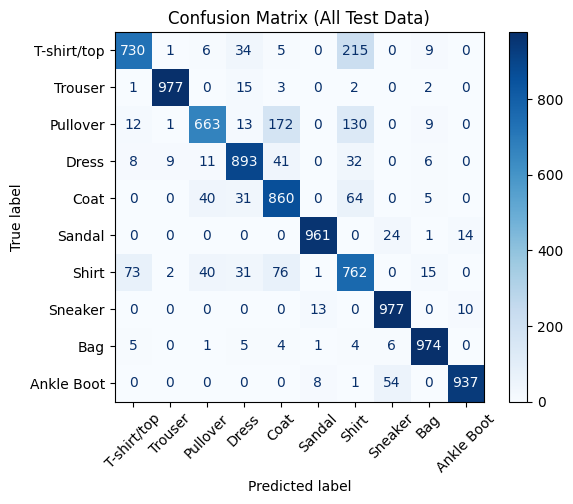

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 전체 테스트 데이터에 대한 예측
predictions_all = strong_model.predict(x_test)
predicted_classes_all = predictions_all.argmax(axis=1)  # 전체 데이터의 예측된 클래스

# 전체 테스트 데이터에 대한 실제 클래스
true_classes_all = y_test  # y_test는 정수형 레이블이어야 함

# 혼동 행렬 계산 및 시각화
cm = confusion_matrix(true_classes_all, predicted_classes_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# 시각화
plt.figure(figsize=(10, 10))
disp.plot(cmap="Blues", values_format='d', xticks_rotation=45)  # x축 레이블 45도 회전
plt.title("Confusion Matrix (All Test Data)")
plt.show()


-   SGD 옵티마이저의 은닉층 2개만 한 기존 모델과 비교해보면

    
    shirt를 맞추는 모델성능은 눈에 띄게 개선되었지만 (대각행렬 467 -> 762)

    t-shirt/top이랑 (대각행렬 863->730)

    pull over는(대각행렬 809 -> 663)으로

 오히려 약간 덜 맞춤 / 전반적인 정확도는 증가